In [1]:
import mailbox

In [2]:
## file path 
mbox_file = r"G:\ubuntu_files\python_lectures_self\email_data\Takeout\Mail\All mail Including Spam and Trash.mbox"
mbox = mailbox.mbox(mbox_file)

In [3]:
## columns present inside the mbox file
for keys in mbox[0].keys():
    print(keys)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
Received
DKIM-Signature
Received
Sender
Reply-To
Recipient-Id
X-Debug
X-Email-Rejection-Mode
X-Api-Host
Site-Id
X-BounceEmailVersion
From
To
Message-ID
Date
Subject
MIME-Version
Content-Type
X-OriginalArrivalTime


In [4]:
## writing the required columns only
import csv

with open('mailbox_march_13.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [5]:
## using the just now created csv file
import pandas as pd

dfs = pd.read_csv('mailbox_march_13.csv')
dfs.head(2)

,subject,from,date,to,label,thread
0,Please DocuSign: Contract for Service - Rishi....,"""iPrice Recruitment via DocuSign"" <dse_na2@doc...","Thu, 25 Feb 2021 23:27:37 -0800","""Rishi Nigam"" <rishinigam1304@gmail.com>","Inbox,Opened,Category updates",1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,"""LiNa Recommendations"" <no-reply@recs.jobstree...","Tue, 02 Mar 2021 23:05:37 +0000 (UTC)",<rishinigam1304@gmail.com>,"Inbox,Category promotions,Unread",1693163288698144759


In [6]:
## description about the file
dfs.describe()

,thread
count,1.735000e+03
mean,1.687944e+18
std,3.686136e+15
min,1.680407e+18
25%,1.684771e+18
50%,1.688389e+18
75%,1.691099e+18
max,1.694077e+18


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1735 non-null   object
 1   from     1735 non-null   object
 2   date     1735 non-null   object
 3   to       1733 non-null   object
 4   label    1735 non-null   object
 5   thread   1735 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 81.5+ KB


In [8]:
## analyzing date
dfs['date'] = dfs['date'].apply(lambda y: pd.to_datetime(y, errors='coerce', utc=True))

In [9]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  1735 non-null   object             
 1   from     1735 non-null   object             
 2   date     1735 non-null   datetime64[ns, UTC]
 3   to       1733 non-null   object             
 4   label    1735 non-null   object             
 5   thread   1735 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 81.5+ KB


In [10]:
dfs.head(2)

,subject,from,date,to,label,thread
0,Please DocuSign: Contract for Service - Rishi....,"""iPrice Recruitment via DocuSign"" <dse_na2@doc...",2021-02-26 07:27:37+00:00,"""Rishi Nigam"" <rishinigam1304@gmail.com>","Inbox,Opened,Category updates",1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,"""LiNa Recommendations"" <no-reply@recs.jobstree...",2021-03-02 23:05:37+00:00,<rishinigam1304@gmail.com>,"Inbox,Category promotions,Unread",1693163288698144759


In [11]:
## checking the whole data for Na values
dfs.isna().sum()

subject    0
from       0
date       0
to         2
label      0
thread     0
dtype: int64

In [12]:
## removing the NaN values from the date
dfs = dfs[dfs['date'].notna()]

In [13]:
## writing into a new csv file
dfs.to_csv('mailbox_13_gmail_cleaned_date.csv')

In [14]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 0 to 1734
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  1735 non-null   object             
 1   from     1735 non-null   object             
 2   date     1735 non-null   datetime64[ns, UTC]
 3   to       1733 non-null   object             
 4   label    1735 non-null   object             
 5   thread   1735 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 94.9+ KB


In [15]:
## EDA on "from" column
import re
import numpy as np

def extract_email(string):
    email = re.findall(r'<(.+?)?>', string)
    if not email:
        email = list(filter(lambda x: '@' in x, string.split()))
    return email[0] if email else np.nan

dfs['from'] = dfs['from'].apply(lambda z: extract_email(z))

In [16]:
dfs.head(2)

,subject,from,date,to,label,thread
0,Please DocuSign: Contract for Service - Rishi....,dse_na2@docusign.net,2021-02-26 07:27:37+00:00,"""Rishi Nigam"" <rishinigam1304@gmail.com>","Inbox,Opened,Category updates",1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,no-reply@recs.jobstreet.com,2021-03-02 23:05:37+00:00,<rishinigam1304@gmail.com>,"Inbox,Category promotions,Unread",1693163288698144759


In [17]:
## updating our 'label' column
my_email = 'rishinigam1304@gmail.com'
dfs['label'] = dfs['from'].apply(lambda y: 'sent' if y==my_email else 'inbox')

In [18]:
## dropping a column
dfs.drop(columns='to', inplace=True)

In [19]:
dfs.head(2)

,subject,from,date,label,thread
0,Please DocuSign: Contract for Service - Rishi....,dse_na2@docusign.net,2021-02-26 07:27:37+00:00,inbox,1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,no-reply@recs.jobstreet.com,2021-03-02 23:05:37+00:00,inbox,1693163288698144759


In [20]:
## checking how many unique values of labels i have
dfs['label'].value_counts()

inbox    1649
sent       86
Name: label, dtype: int64

In [21]:
dfs.head(10)

,subject,from,date,label,thread
0,Please DocuSign: Contract for Service - Rishi....,dse_na2@docusign.net,2021-02-26 07:27:37+00:00,inbox,1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,no-reply@recs.jobstreet.com,2021-03-02 23:05:37+00:00,inbox,1693163288698144759
2,Walk-in interview for International BPOs SPOTO...,opportunities@monsterindia.com,2021-03-11 07:55:22+00:00,inbox,1693921389928603610
3,Thank you for participating in Uber Hacktag,noreply@dare2compete.events,2021-03-02 06:06:21+00:00,inbox,1693099158951573247
4,Mobile Apps Software Developer + 19 new jobs -...,no-reply@recs.jobstreet.com,2021-02-26 23:00:49+00:00,inbox,1692800598686088799
5,Upskill yourself with these courses!,hello@wobbjobs.com,2021-03-02 07:01:34+00:00,inbox,1693102700788051156
6,Data Science Projects That Will Get You The Jo...,noreply@medium.com,2021-03-09 23:00:00+00:00,inbox,1693797117160259609
7,Open. Select. Apply. Get =?utf-8?Q?Hired=2E=E2...,no-reply@talent.com,2021-03-13 01:04:37+00:00,inbox,1694076741506810246
8,Virtual Meet-up with iPrice's Co-Founder!,alyssa@ipricegroup.com,2021-02-26 08:44:12+00:00,inbox,1692746703202415667
9,AWS Dev / Java Dev / Solution Architect (Digi...,opportunities@monster.com.my,2021-03-08 03:25:12+00:00,inbox,1693632599747644749


In [22]:
## now we look into refactoring the date and time according to our tz
import datetime
import pytz

def refractor_time(x):
    sest = pytz.timezone('Asia/Kuala_Lumpur')
    return x.astimezone(sest)


dfs['date'] = dfs['date'].apply(lambda x: refractor_time(x))

In [23]:
dfs.head(2)

,subject,from,date,label,thread
0,Please DocuSign: Contract for Service - Rishi....,dse_na2@docusign.net,2021-02-26 15:27:37+08:00,inbox,1692741883601937431
1,IT Solution Architect (Finance & HR) + 19 new ...,no-reply@recs.jobstreet.com,2021-03-03 07:05:37+08:00,inbox,1693163288698144759


In [24]:
dfs['dayOfWeek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayOfWeek'] = pd.Categorical(dfs['dayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

dfs['hour'] = dfs['date'].apply(lambda x: x.hour)
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)
dfs.index = dfs['date']
del dfs['date']


In [25]:
dfs.head(2)

,subject,from,label,thread,dayOfWeek,timeofday,hour,year_int,year
date,,,,,,,,,
2021-02-26 15:27:37+08:00,Please DocuSign: Contract for Service - Rishi....,dse_na2@docusign.net,inbox,1692741883601937431,Friday,15.460278,15,2021,2021.156057
2021-03-03 07:05:37+08:00,IT Solution Architect (Finance & HR) + 19 new ...,no-reply@recs.jobstreet.com,inbox,1693163288698144759,Wednesday,7.093611,7,2021,2021.169747


In [26]:
#"How many emails did I send during a given timeframe?"
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Tue, 13 Oct 2020 11:54 AM
Sat, 13 Mar 2021 09:04 AM
inbox    1649
sent       86
Name: label, dtype: int64


In [27]:
## time to draw graphs
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [28]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [29]:
#Let's create two sub-dataframe—one for sent emails and another for received emails:

sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

<ipython-input-28-92f26f761ef3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<AxesSubplot:title={'center':'Received'}>

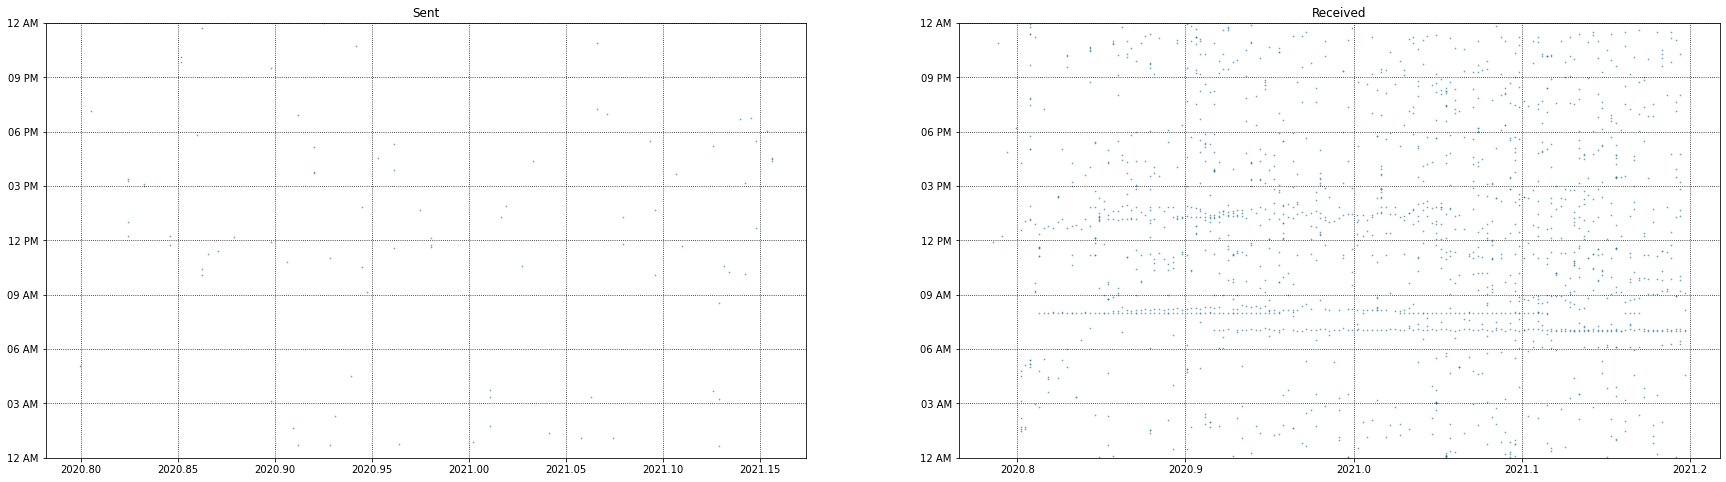

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [31]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [32]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [33]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-28-92f26f761ef3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-32-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


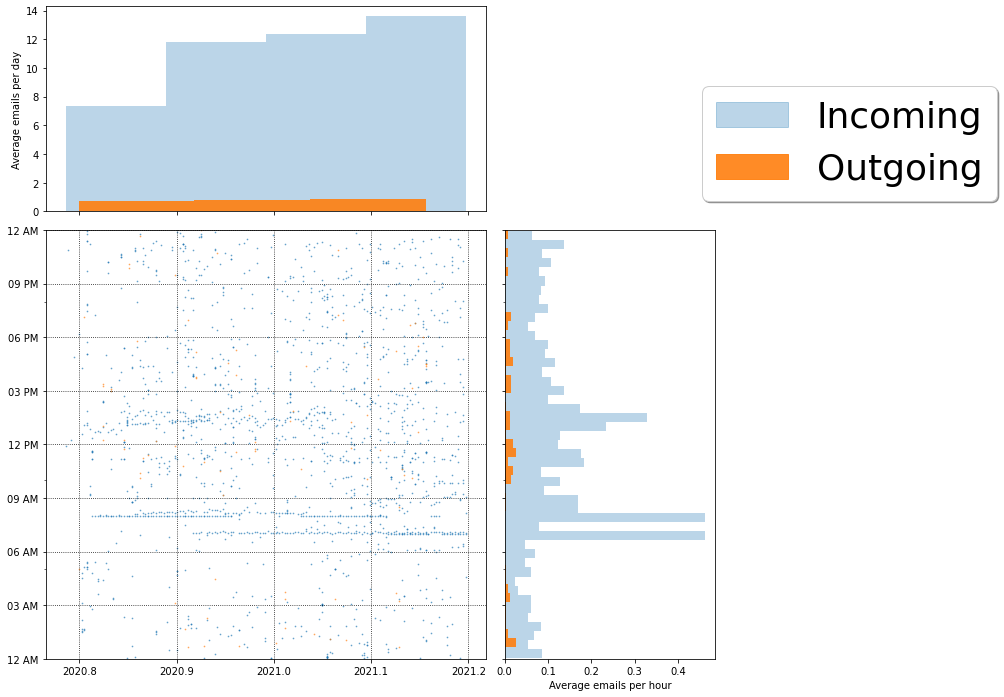

In [34]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.3)
tpl.plot(sent, color='C1', alpha=0.9)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.3)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.9)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=36, shadow=True);

<AxesSubplot:>

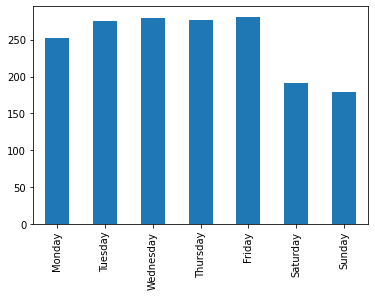

In [36]:
counts = dfs.dayOfWeek.value_counts(sort=False)
counts.plot(kind='bar')

In [37]:
## recieved values
addrs = received['from'].value_counts()

addrs[0:10]

no-reply@talent.com                     188
noreply@medium.com                      133
no-reply@recs.jobstreet.com             103
noreply@notifications.freelancer.com     95
hello@wobbjobs.com                       56
connect@analyticsvidhya.com              38
jobalert@timesjobs.com                   34
expertspeak@techgig.com                  27
support@graduan.com                      27
noreply@updates.freelancer.com           25
Name: from, dtype: int64

<ipython-input-28-92f26f761ef3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-32-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


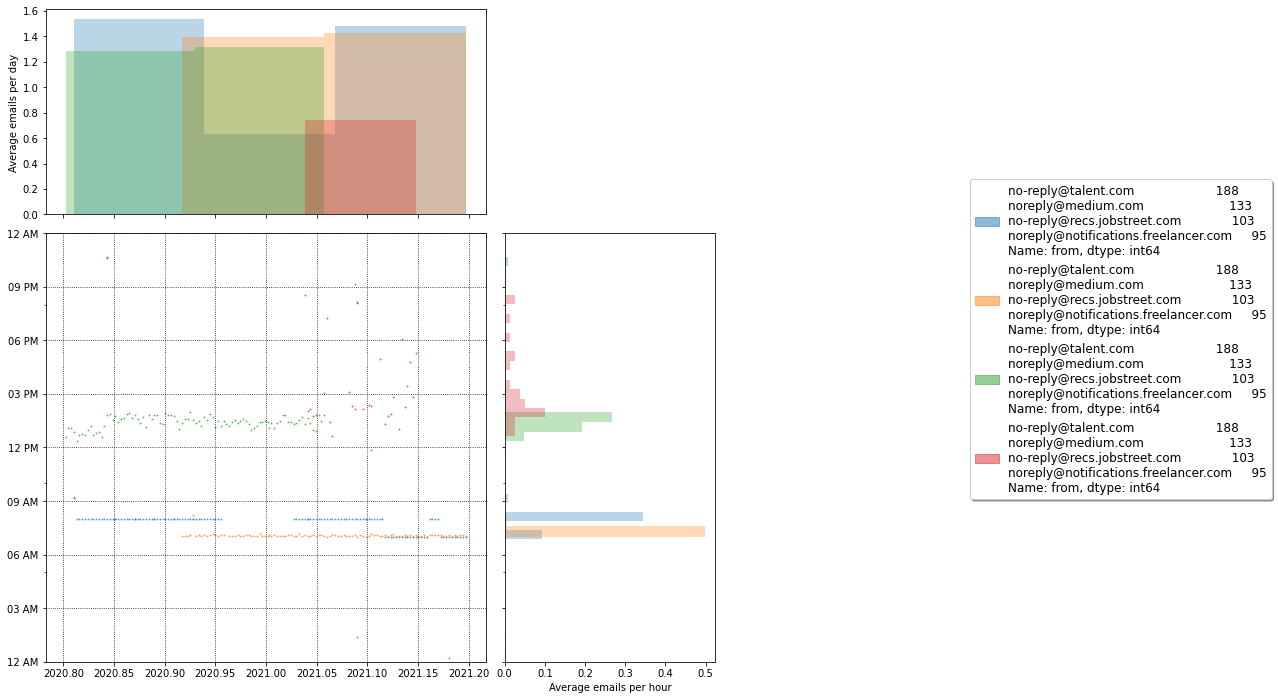

In [40]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[2.8, 0.2], fontsize=12, shadow=True);

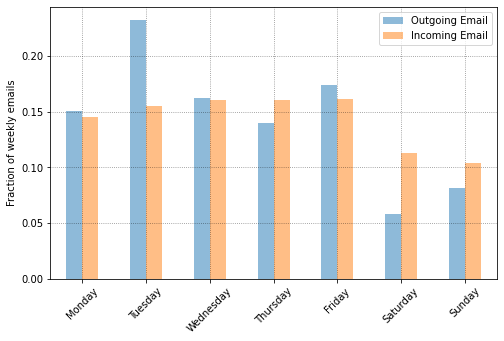

In [42]:
sdw = sent.groupby('dayOfWeek').size() / len(sent)
rdw = received.groupby('dayOfWeek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

<ipython-input-32-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-32-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-32-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-32-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-32-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(

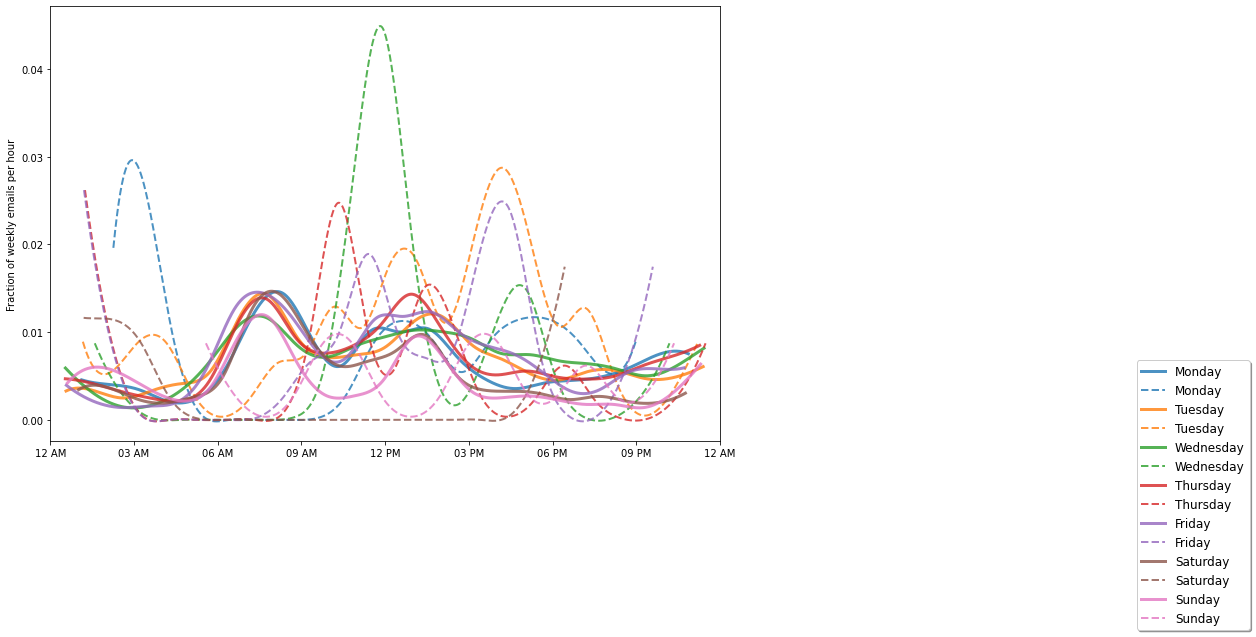

In [45]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(12,8))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayOfWeek.cat.categories):
    df_r = received[received['dayOfWeek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayOfWeek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(bbox_to_anchor=[1.8, 0.2], fontsize=12, shadow=True)


In [46]:
from wordcloud import WordCloud 

text = ' '.join(map(str, dfs['subject'].values))

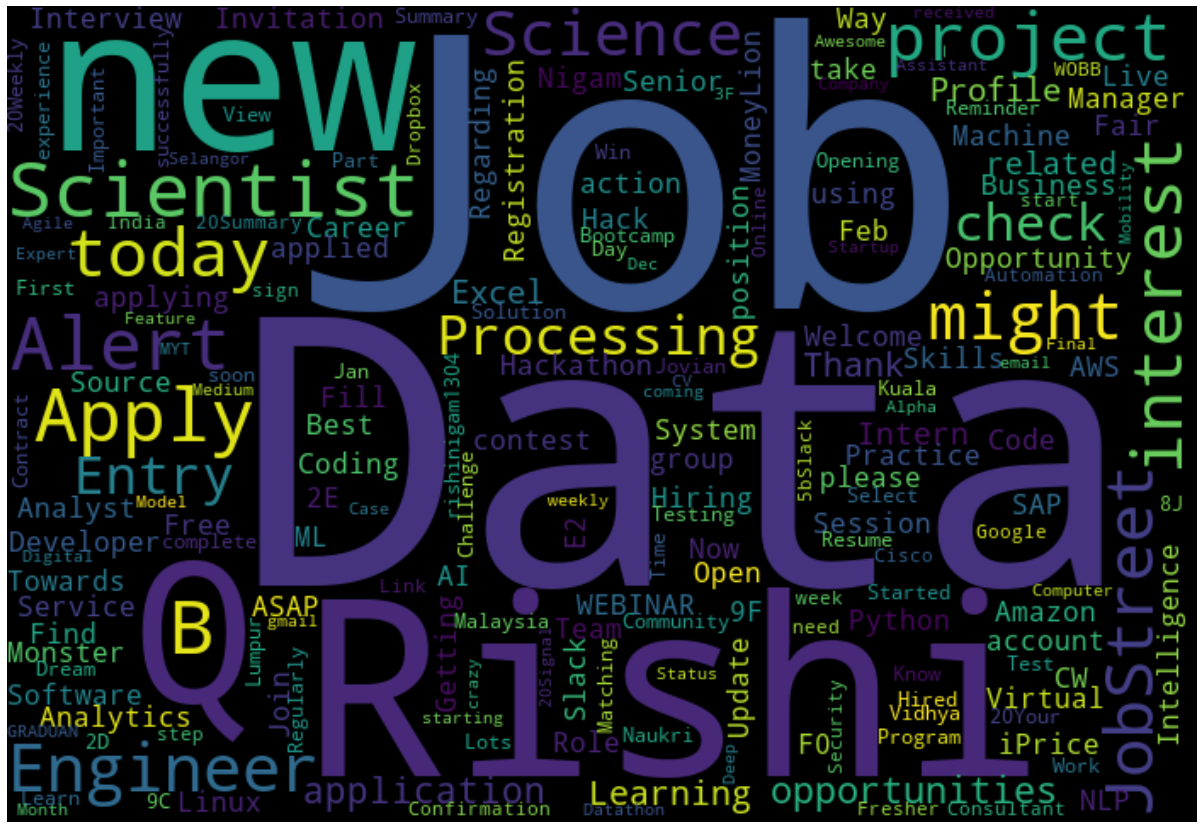

In [48]:
stopwords = ['Re', 'Fwd', '3A_', 'utf']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)